<a href="https://colab.research.google.com/github/ramyasnl/test_project/blob/applebranch/Copy_of_Heart_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf


In [ ]:
heart_failure_df = pd.read_csv('https://ramyasnl-finalproject.s3.us-east-2.amazonaws.com/heart_failure_clinical_records_dataset.csv')
heart_failure_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
heart_df = pd.read_csv('https://ramyasnl-finalproject.s3.us-east-2.amazonaws.com/heart.csv')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Attribute Information:
From :https://archive.ics.uci.edu/ml/datasets/heart+disease
0.age: age in years
1.sex: sex (1 = male; 0 = female)
2.cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
3.trtbps:(restbps: )resting blood pressure (in mm Hg on admission to the hospital)
4.chol: serum cholestoral in mg/dl
5.fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
6.restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
7.thalach: maximum heart rate achieved
8.exang: exercise induced angina (1 = yes; 0 = no)
9.oldpeak = ST depression induced by exercise relative to rest
10.slp:( slope:) the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
11.caa:ca: number of major vessels (0-3) colored by flourosopy
12.thall:(thal:) 3 = normal; 6 = fixed defect; 7 = reversable defect
13.output :num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

In [ ]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Check the data for imbalances
heart_df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
#Check the maximum correlation of the heart_df.output with other variables
heart_df.corr().abs()['output'].sort_values(ascending = False)

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64

In [ ]:
# Split our preprocessed and checked  data into our features and target arrays
y = heart_df['output'].values
X = heart_df.drop(['output'],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=86)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
len(X_train_scaled[0])

13

# ** Compile, Train and Evaluate the Model **

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled [0])
hidden_nodes_layer1 =  40
hidden_nodes_layer2 = 26

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                560       
_________________________________________________________________
dense_1 (Dense)              (None, 26)                1066      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 27        
Total params: 1,653
Trainable params: 1,653
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 14.4013 - accuracy: 0.5463
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 9.3377 - accuracy: 0.3568
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 7.3269 - accuracy: 0.4273
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 6.4466 - accuracy: 0.5066
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 5.1073 - accuracy: 0.3877
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 4.1113 - accuracy: 0.4670
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 3.0529 - accuracy: 0.4273
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 2.1474 - accuracy: 0.4626
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 1.4478 - accuracy: 0.4890
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9887 - accuracy: 0.5683
Epoch 11/100
8/8 [==========

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.5268 - accuracy: 0.7368
Loss: 0.5268447995185852, Accuracy: 0.7368420958518982


#** Compile, Train and Evaluate the Model Adding Another Hidden layer**

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled [0])
hidden_nodes_layer1 =  70
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 70)                980       
_________________________________________________________________
dense_4 (Dense)              (None, 40)                2840      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 5,081
Trainable params: 5,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy",
           optimizer="adamax",
           metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,
                   y_train,epochs=200)

Epoch 1/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7184 - accuracy: 0.5330
Epoch 2/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6167
Epoch 3/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6740
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.7313
Epoch 5/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.7577
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5899 - accuracy: 0.7930
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.8106
Epoch 8/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.8370
Epoch 9/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.8326
Epoch 10/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.8370
Epoch 11/200
8/8 [===========

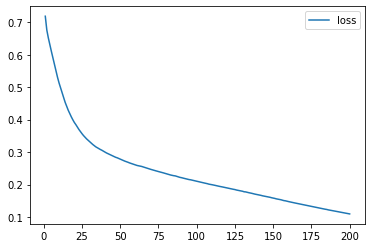

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
#TO READ THE LOSS GRAPH :https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

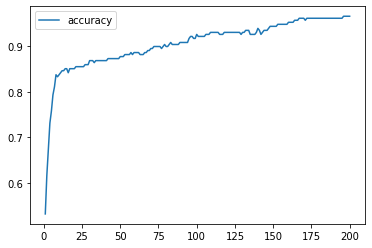

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.4720 - accuracy: 0.8289
Loss: 0.47200432419776917, Accuracy: 0.8289473652839661
